In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [3]:
dataset = pd.read_csv("combined.csv")
#print(dataset.head(1))
len_of_datset = len(dataset)
dataset.head()

,word_1,word_2,condition,WUP_score,correct_incorrect,key_pressed,response_status,reaction_time,age_list
0,bread,utrtbe,3,0.00,0,n,1,1389.216185,18
1,bread,laptop,4,0.20,1,y,1,1108.018875,18
2,engine,tairn,2,0.00,0,n,1,1035.490990,18
3,doctor,shampoo,4,0.21,1,y,1,937.063217,18
4,engine,train,1,0.63,1,y,1,1017.201900,18


## Data Exploration

### About participants
#### Average age distribution

In [4]:
# Average age of participants
groupby_age = dataset.groupby(by=['age_list'])
age_distribution = (groupby_age.size()/76).astype('int')
average_age = sum(age_distribution*age_distribution.index)/sum(age_distribution)
#int(age_distribution)
#print(age_distribution)

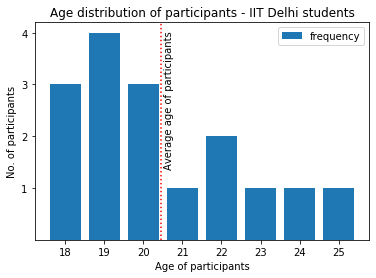

In [5]:
plt.axvline(average_age, color='red', ls='dotted', label='_nolegend_')
plt.text(average_age+0.1,1.4,'Average age of participants',rotation=90)
plt.xlabel("Age of participants")
plt.ylabel("No. of participants")
plt.yticks(range(1,5))
plt.bar(age_distribution.index, age_distribution)
plt.legend(["frequency"])
plt.title("Age distribution of participants - IIT Delhi students")
plt.show()

In [6]:
### Reaction Time Vs 4 conditions

In [7]:
groupby_condition_rt = dataset.groupby(by=['condition', 'response_status'])

In [124]:
# Sanity check
groupby_condition_rt.count()

word_1  word_2  WUP_score  correct_incorrect  \
condition response_status                                                 
1         0                    31      31         31                 31   
          1                   262     262        262                262   
          2                    11      11         11                 11   
2         0                   113     113        113                113   
          1                   175     175        175                175   
          2                    16      16         16                 16   
3         0                    26      26         26                 26   
          1                   266     266        266                266   
          2                    12      12         12                 12   
4         0                    18      18         18                 18   
          1                   277     277        277                277   
          2                     9       9          9                  9   

                           key_pressed  reaction_time  age_list  
condition response_status                                        
1         0                         31             31        31  
          1                        262            262       262  
          2                         11             11        11  
2         0                        113            113       113  
          1                        175            175       175  
          2                         16             16        16  
3         0                         26             26        26  
          1                        266            266       266  
          2                         12             12        12  
4         0                         18             18        18  
          1                        277            277       277  
          2                          9              9         9

response_status       0        1       2
condition                               
1                1.9375  16.3750  0.6875
2                7.0625  10.9375  1.0000
3                1.6250  16.6250  0.7500
4                1.1250  17.3125  0.5625


Text(0, 0.5, 'Average response per participant')

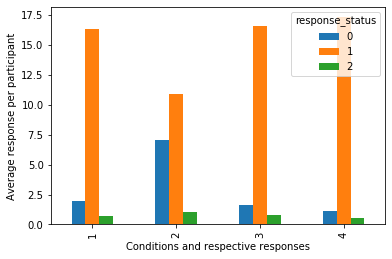

In [113]:
# CrossTab condition Vs Response

crosstab_condition_response_status = pd.crosstab(dataset['condition'], dataset['response_status'])#.plot.bar()
crosstab_condition_response_status = crosstab_condition_response_status/16#.plot.bar()
#plt.clf()
print(crosstab_condition_response_status)
crosstab_condition_response_status.plot.bar()
plt.xlabel("Conditions and respective responses")
plt.ylabel("Average response per participant")
#plt.legend(["frequency"])
